Some Reseach Questions: 
•	How do traditional statistical models (e.g., Logistic Regression, Cox Proportional Hazards) compare to machine learning models (e.g., Random Forests, Neural Networks) in predicting bankruptcy?
•	Can ensemble methods improve the accuracy of bankruptcy prediction compared to standalone models?
•	Which financial ratios related to profitability, liquidity, leverage, efficiency, coverage and Altman components, are the most significant predictors of bankruptcy across industries?
•	How does the size of a company (e.g., small vs. large enterprises) influence the effectiveness of bankruptcy prediction models?
•	How do economic crises or recessions impact bankruptcy risk?

Some additional issues with the data: 
As a baseline we do what were doing: i.e. assume that by dropping duplicates everything is ok.
There are multiple events for any given company. Does that mean that they were in chapter 11? In which case, if we make that assumption then we can set that as another variable.**Need to count these cases.**
There seem to be cases where the company is no longer in the dataset before the end of the period, but no failure is recorded. Should they be recorded as chapter 7? Or should we treat them as missing data? Or should they be dropped? **Need to count these cases.**
How many cases of companies are there of companies that entered the dataset during this period? Or are all left_censored? Do we need to have a variable for left_censored?
Do a count of the number of unique companies by year. Do a unique count of the number of failures by year.
Introduce some lags. This can be done without setting up a new feature.



In [ ]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\deanh\OneDrive\DSI\modules\Team\american_bankruptcy.csv'

# Load the data
df = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


Variable descriptions: 
X1	Current assets - All the assets of a company that are expected to be sold or used as a result of standard
business operations over the next year
X2	Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products
X3	Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over
time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of
intangible assets over time.
X4	EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's
overall financial performance, serving as an alternative to net income.
X5	Inventory - The accounting of items and raw materials that a company either uses in production or sells.
X6	Net Income - The overall profitability of a company after all expenses and costs have been deducted from
total revenue.
X7	Total Receivables - The balance of money due to a firm for goods or services delivered or used but not
yet paid for by customers.
X8	Market value - The price of an asset in a marketplace. In this dataset, it refers to the market
capitalization since companies are publicly traded in the stock market.
X9	Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.
X10	Total assets - All the assets, or items of value, a business owns.
X11	Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.
X12	EBIT - Earnings before interest and taxes.
X13	Gross Profit - The profit a business makes after subtracting all the costs that are related to
manufacturing and selling its products or services.
X14	Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds
payable at the end of the year, salaries, and commissions remaining.
X15	Retained Earnings - The amount of profit a company has left over after paying all its direct costs,
indirect costs, income taxes, and its dividends to shareholders.
X16	Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.
X17	Total Liabilities - The combined debts and obligations that the company owes to outside parties.
X18	Total Operating Expenses - The expenses a business incurs through its normal business operations.

In [ ]:
# Check column names
print(df.columns)

# Summary of the dataset (e.g., variable types, non-null counts)
print(df.info())

# Descriptive statistics of numeric variables
print(df.describe())


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicated rows
print(df.duplicated().sum())

# Check the shape of the dataset
print(df.shape)

In [ ]:
# Drop duplicated rows?
df.drop_duplicates(inplace=True)
# Check the shape of the dataset
print(df.shape)

In [ ]:
# Display summary statistics for the core variables
summary_stats = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 
                     'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 
                     'X16', 'X17', 'X18']].describe()

print(summary_stats)

In [ ]:
# Calculate skewness for the main variables
skewness = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 
               'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 
               'X16', 'X17', 'X18']].skew()

print(skewness)

In [ ]:
# This tests for skewness in one variable. All X1-X18 variables are 
# skewed so would need to be transformed. You can choose the one with 
# the result closest to zero and use that transform.
# 
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Example column with high skewness
column = 'X1'

# Log Transformation
df[f'{column}_log'] = np.log1p(df[column])

# Square Root Transformation
df[f'{column}_sqrt'] = np.sqrt(df[column])

# Box-Cox Transformation (requires positive values)
df[f'{column}_boxcox'], _ = boxcox(df[column] + 1)  # Adding 1 to ensure all values are positive

# Reciprocal Transformation
df[f'{column}_reciprocal'] = 1 / (df[column] + 1)  # Adding 1 to avoid division by zero

# Calculate skewness after transformation
skewness_log = df[f'{column}_log'].skew()
skewness_sqrt = df[f'{column}_sqrt'].skew()
skewness_boxcox = df[f'{column}_boxcox'].skew()
skewness_reciprocal = df[f'{column}_reciprocal'].skew()

print(f'Skewness after log transformation: {skewness_log}')
print(f'Skewness after square root transformation: {skewness_sqrt}')
print(f'Skewness after Box-Cox transformation: {skewness_boxcox}')
print(f'Skewness after reciprocal transformation: {skewness_reciprocal}')

In [ ]:
# Create Financial Ratios and Derived Features
# Liquidity Ratios
df['current_ratio'] = df['X1'] / df['X14']
df['quick_ratio'] = (df['X1'] - df['X5']) / df['X14']

# Leverage Ratios
df['debt_to_equity_ratio'] = df['X17'] / (df['X10'] - df['X17'])
df['long_term_debt_to_assets'] = df['X11'] / df['X10']

# Profitability Ratios
df['profit_margin'] = df['X6'] / df['X16']
df['gross_margin'] = df['X13'] / df['X16']
df['return_on_assets'] = df['X6'] / df['X10']
df['return_on_equity'] = df['X6'] / (df['X10'] - df['X17'])

# Efficiency Ratios
df['asset_turnover'] = df['X9'] / df['X10']
df['receivables_turnover'] = df['X9'] / df['X7']
df['inventory_turnover'] = df['X2'] / df['X5']

# Coverage Ratios
df['interest_coverage_ratio'] = df['X12'] / df['X11']  # Assuming interest expense = long-term debt
df['debt_service_coverage_ratio'] = df['X4'] / df['X11']

# Altman Z-Score Components
df['working_capital_to_assets'] = (df['X1'] - df['X14']) / df['X10']
df['retained_earnings_to_assets'] = df['X15'] / df['X10']
df['ebit_to_assets'] = df['X12'] / df['X10']
df['market_value_to_liabilities'] = df['X8'] / df['X17']
df['sales_to_assets'] = df['X9'] / df['X10']

# Handle divisions by zero or invalid values
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(inplace=True)


In [ ]:
# Growth Rates
# Sort the data by company name and year
df = df.sort_values(by=['company_name', 'year'])

# Sales Growth
df['sales_growth'] = df.groupby('company_name')['X9'].pct_change()

# EBITDA Growth
df['ebitda_growth'] = df.groupby('company_name')['X4'].pct_change()


In [133]:
# Creating change variables generates nan values for the first year 
# of each company. So either have drop of fill with 0.
# Fill NaN values with 0
df['sales_growth'] = df['sales_growth'].fillna(0)
df['ebitda_growth'] = df['ebitda_growth'].fillna(0)

In [ ]:
# Find NaN values in the DataFrame
nan_counts_new_features = df[new_features].isnull().sum()

# Print the count of NaN values for each column
print("Count of NaN values in each column:")
print(nan_counts_new_features)

Not all of these newly constructed features are relevant. Profitability, liquidity, leverage, efficiency and coverage can all impact financial viability, but typically you would choose one that fits best within category (there will be high collinearity between some especially for those that are alternative measures). The Altman Z-Score Components (Altman, 1968) are also often used to assess the financial health of a company. (These are not the actual Altman scores, but close enough for a first run.)

In [119]:
# List of newly created variables
new_features = [
    'current_ratio', 'quick_ratio', 'debt_to_equity_ratio', 
    'long_term_debt_to_assets', 'profit_margin', 
    'gross_margin', 'return_on_assets', 
    'return_on_equity', 'asset_turnover', 
    'receivables_turnover', 'inventory_turnover', 
    'interest_coverage_ratio', 
    'debt_service_coverage_ratio', 
    'working_capital_to_assets', 
    'retained_earnings_to_assets', 'ebit_to_assets', 
    'market_value_to_liabilities', 'sales_to_assets',
    'sales_growth', 'ebitda_growth', 'event', 
    'start_year', 'end_year', 'duration'
]

# Convert the specified columns to numeric
for column in new_features:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Display summary statistics for the newly created variables
summary_stats = df[new_features].describe().round(3)

# Print the summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
       current_ratio  quick_ratio  debt_to_equity_ratio  \
count      45012.000    45012.000             45012.000   
mean           2.300        1.677                 4.686   
std            5.977        5.853               440.129   
min            0.002        0.000             -2556.420   
25%            1.177        0.772                 0.511   
50%            1.779        1.193                 1.077   
75%            2.704        1.868                 2.056   
max         1194.253     1181.616             87701.500   

       long_term_debt_to_assets  profit_margin  gross_margin  \
count                 45012.000      45012.000     45012.000   
mean                      0.263         -1.506        -0.226   
std                       0.475         44.612        26.544   
min                      -0.035      -5463.667     -3853.000   
25%                       0.075         -0.053         0.209   
50%                       0.205          0.024         0.328   


c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [120]:
# Print the data types of the newly created variables
print("\nData Types:")
print(df[new_features].dtypes)


Data Types:
current_ratio                  float64
quick_ratio                    float64
debt_to_equity_ratio           float64
long_term_debt_to_assets       float64
profit_margin                  float64
gross_margin                   float64
return_on_assets               float64
return_on_equity               float64
asset_turnover                 float64
receivables_turnover           float64
inventory_turnover             float64
interest_coverage_ratio        float64
debt_service_coverage_ratio    float64
working_capital_to_assets      float64
retained_earnings_to_assets    float64
ebit_to_assets                 float64
market_value_to_liabilities    float64
sales_to_assets                float64
sales_growth                   float64
ebitda_growth                  float64
event                            int32
start_year                       int64
end_year                         int64
duration                       float64
dtype: object


In [121]:
# Get a list of all variables (columns) in the DataFrame
all_variables = df.columns.tolist()

# Print the list of variables
print(all_variables)

['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'current_ratio', 'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets', 'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity', 'asset_turnover', 'receivables_turnover', 'inventory_turnover', 'interest_coverage_ratio', 'debt_service_coverage_ratio', 'working_capital_to_assets', 'retained_earnings_to_assets', 'ebit_to_assets', 'market_value_to_liabilities', 'sales_to_assets', 'sales_growth', 'ebitda_growth', 'event', 'start_year', 'end_year', 'duration', 'X1_log', 'X1_sqrt', 'X1_boxcox', 'X1_reciprocal']


Correlation Matrix for New Features:
                             current_ratio  quick_ratio  debt_to_equity_ratio  \
current_ratio                        1.000        0.994                -0.002   
quick_ratio                          0.994        1.000                -0.001   
debt_to_equity_ratio                -0.002       -0.001                 1.000   
long_term_debt_to_assets            -0.036       -0.028                 0.007   
profit_margin                        0.001       -0.002                -0.002   
gross_margin                        -0.002       -0.004                -0.002   
return_on_assets                     0.014        0.010                -0.000   
return_on_equity                     0.001        0.000                -0.800   
asset_turnover                      -0.042       -0.054                -0.005   
receivables_turnover                -0.006       -0.007                -0.001   
inventory_turnover                   0.003        0.010                 

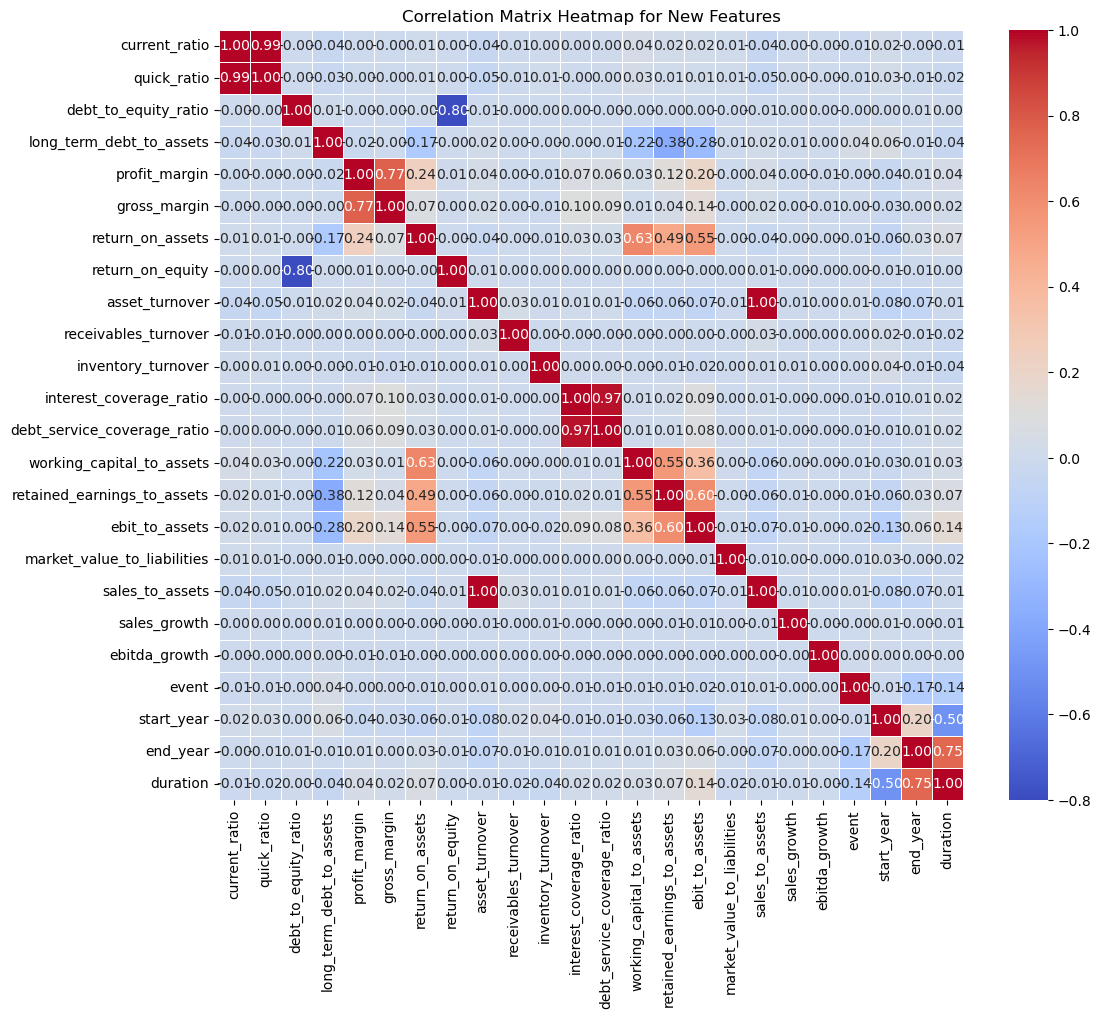

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the specified columns to numeric
for column in new_features:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the correlation matrix for the newly created variables
corr_matrix_new_vars = df[new_features].corr().round(3)

# Print the correlation matrix
print("Correlation Matrix for New Features:")
print(corr_matrix_new_vars)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_new_vars, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for New Features')
plt.show()

In [123]:
df['status_label'].value_counts()


status_label
alive     41808
failed     3204
Name: count, dtype: int64

In [ ]:
# Create event indicator (1 if failed, 0 if alive)
df['event'] = (df['status_label'] == 'failed').astype(int)

# Create time-to-event variable (assuming the data is yearly and grouped by company)
df['start_year'] = df.groupby('company_name')['year'].transform('min')
df['end_year'] = df.groupby('company_name')['year'].transform('max')
df['duration'] = df['end_year'] - df['start_year'] + 1


In [ ]:
df['duration'] = df['duration'].astype(float)
df['event'] = df['event'].astype(int)

In [ ]:
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from IPython.display import display

# other new features: ['year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 
# 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 
# 'X17', 'X18', 'current_ratio', 'quick_ratio', 
# 'debt_to_equity_ratio', 'long_term_debt_to_assets', 'profit_margin',
# 'gross_margin', 'return_on_assets', 'return_on_equity', 
# 'asset_turnover', 'receivables_turnover', 'inventory_turnover', 
# 'interest_coverage_ratio', 'debt_service_coverage_ratio', 
# 'working_capital_to_assets', 'retained_earnings_to_assets', 
# 'ebit_to_assets', 'market_value_to_liabilities', 'sales_to_assets',
# 'sales_growth', 'ebitda_growth', 'event', 'start_year', 'end_year',
# 'duration'],

# Select relevant predictors and the survival variables
predictors = [
    'return_on_equity', 'quick_ratio', 'long_term_debt_to_assets',
    'debt_to_equity_ratio', 'sales_growth', 'market_value_to_liabilities', 
    'year'
]

# Prepare the dataset for the model
df_model = df[['duration', 'event'] + predictors].dropna()


# we will want to explore lags here as well, but need to be careful of generating NaNs. 

In [ ]:
# Check for missing values
print(df_model.isnull().sum())

In [ ]:
# Standardize predictors
scaler = StandardScaler()
df_model[predictors] = scaler.fit_transform(df_model[predictors])

# Check for multicollinearity
corr_matrix = df_model[predictors].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Check for zero variance
print(df_model[predictors].var())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to calculate VIF
X = df_model[predictors]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


In [145]:
# Check for outliers
# for predictor in predictors:
#    sns.boxplot(x=df_model[predictor])
#     plt.show()

# Check for perfect separation
log_reg = LogisticRegression()
log_reg.fit(df_model[predictors], df_model['event'])
log_reg_coef = log_reg.coef_.round(3)
print("Logistic Regression Coefficients:")
print(log_reg_coef)

# Initialize and fit the Cox model with a penalizer
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_model, duration_col='duration', event_col='event')

# Capture model summary as a DataFrame
summary_df = cph.summary.round(3)

# Display the summary DataFrame
display(summary_df)

Logistic Regression Coefficients:
[[-0.038 -0.178  0.094 -0.119 -0.004 -2.673 -0.366]]


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
return_on_equity,0.002,1.002,0.014,-0.025,0.029,0.976,1.029,0.0,0.155,0.876,0.190
quick_ratio,-0.013,0.987,0.014,-0.041,0.015,0.960,1.015,0.0,-0.902,0.367,1.446
long_term_debt_to_assets,0.058,1.060,0.006,0.046,0.070,1.047,1.073,0.0,9.148,0.000,63.907
debt_to_equity_ratio,-0.003,0.997,0.012,-0.028,0.021,0.973,1.021,0.0,-0.269,0.788,0.344
sales_growth,-0.000,1.000,0.011,-0.022,0.021,0.978,1.021,0.0,-0.037,0.970,0.043
market_value_to_liabilities,-0.006,0.994,0.015,-0.035,0.023,0.966,1.024,0.0,-0.381,0.704,0.507
year,-0.178,0.837,0.012,-0.201,-0.155,0.818,0.856,0.0,-15.340,0.000,174.026


Interpreting the effects: 
Hazard Ratios (HR):
- Derived from the exponentiation of the coefficients (exp(coef)).

- Indicate the multiplicative effect of a one-unit increase in the predictor on the hazard.

HR > 1: Increases the hazard (higher risk).
HR < 1: Decreases the hazard (lower risk).
HR = 1: No effect on the hazard.

- then check p-value for significance

In [ ]:


import pandas as pd
import statsmodels.api as sm


# Select the relevant features and target variable
features = ['return_on_equity', 'quick_ratio', 'long_term_debt_to_assets',
            'debt_to_equity_ratio', 'sales_growth', 'market_value_to_liabilities', 'year']
X = df[features]
y = df['event']  # Target variable (e.g., 1 for bankruptcy, 0 for no bankruptcy)

# Add a constant for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary
print(result.summary())

# Predict probabilities on the test set
y_pred_prob = result.predict(X_test)

# Convert probabilities into binary predictions using a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.250677
         Iterations 10


c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


                           Logit Regression Results                           
Dep. Variable:                  event   No. Observations:                36009
Model:                          Logit   Df Residuals:                    36001
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Mar 2025   Pseudo R-squ.:                 0.02336
Time:                        17:45:42   Log-Likelihood:                -9026.6
converged:                       True   LL-Null:                       -9242.5
Covariance Type:            nonrobust   LLR p-value:                 3.655e-89
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         127.6211      7.654     16.674      0.000     112.619     142.623
return_on_equity            -4.283e-05      0.000     -0.131      0.895      -0.

A lot to fix here but just a quick shot.

# Here are some ideas for next steps:

**This part is mostly done though still verifying some issues as outlined at the top, and cleaning up this code and testing different versions of the model **
- Explore the Data: structure and summary statistics partly done. The variable descriptions can found on kaggle.
- Check for Missing Data: Identify and handle missing values with imputation or removal. Will need to be careful with lags etc.
- Understand Target Variable: check bankruptcy label to identify class imbalance. (discussed at the top)

# Feature Engineering
This is done - all described above
- Financial Ratios: Create ratios like Debt-to-Equity, Current Ratio, or Asset Turnover to capture relationships between variables.
**I haven't done this but will**
- Log Transformation: Apply logarithmic transformation to variables with high skewness (e.g., Total Assets, Net Income).**I haven't done this but will**
- Normalize/Standardize: Scale all numerical features for models sensitive to magnitude differences.**I have done some of this.**

# Choose and Apply ML Models
Here are some ML methods for predicting bankruptcy:

Traditional Algorithms:
- Logistic Regression (baseline model). **I've run one model.**
- Random Forests (for feature importance and accuracy).
- Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost for high performance).

Survival Analysis:
- Use the Cox Proportional Hazards model predicts the time-to-bankruptcy. **I've tested some features but just have one model here.**
- Random Survival Forests for time-to-event predictions with complex interactions.

Deep Learning:
Neural networks to model complex non-linear relationships??

# Address Class Imbalance
If bankrupt companies are underrepresented:
- Use techniques like oversampling (SMOTE) or undersampling.
- Adjust class weights in models to prevent bias towards the majority class.

# Evaluate the Models
- Accuracy & F1-Score: For balanced datasets.
- Precision-Recall: Focus on identifying bankrupt companies when the dataset is imbalanced.
- ROC-AUC: For overall model discrimination.

# Visualize Results
- Visualize survival curves for bankruptcy risks using Kaplan-Meier or Cox PH models.
- Plot feature importance from models like Random Forest or Gradient Boosting to identify key bankruptcy predictors.
- Use correlation heatmaps to show relationships between financial variables.